In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import sph_harm, genlaguerre, factorial




In [2]:

def hydrogen_wave_function(n, l, m, r, theta, phi):

    bohr_radius = 5.2917721067e-11
    a0 = 1
    # Normalization coefficient
    rho = 2 * r / (n * a0)
    normalization = np.sqrt((2 / (n * a0))**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    
    # Angular part: Spherical harmonics
    Y_lm = sph_harm(m, l, phi, theta)

    # Radial part
    L_nl = genlaguerre(n-l-1, 2*l+1)(rho)
    radial_part = (rho**l) * np.exp(-rho / 2) * L_nl

    # Wave function
    psi = normalization * radial_part * Y_lm

    return psi



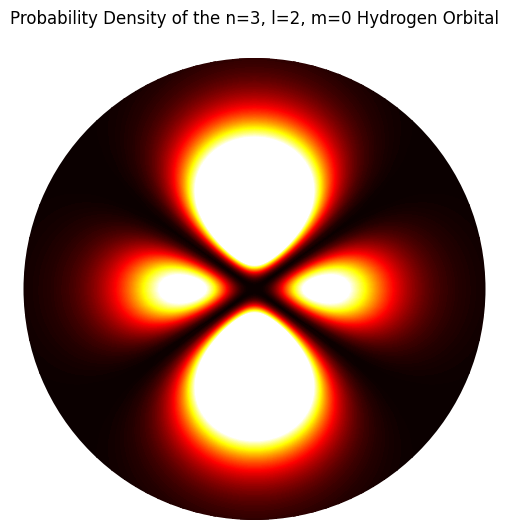

In [3]:
# Define the quantum numbers and create the grid
n, l, m = 3, 2, 0
a0 = 1  # 
r_values = np.linspace(0, 20*a0, 1000)  
theta_values = np.linspace(0, 2*np.pi, 100)  
phi_values = np.linspace(0, 2*np.pi, 100)  


r_grid, theta_grid = np.meshgrid(r_values, theta_values)
phi_grid = np.zeros_like(r_grid) 


psi_values = hydrogen_wave_function(n, l, m, r_grid, theta_grid, phi_grid)


probability_density = np.abs(psi_values)**2

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(6, 6))

levels = np.linspace(np.min(probability_density), np.max(probability_density), 1000)

contour = ax.contourf(theta_grid, r_grid, probability_density, levels, cmap=cm.hot, vmin=np.min(probability_density), vmax= 0.2*np.max(probability_density))
ax.grid(False)
ax.axis('off')
ax.set_theta_offset(np.pi / 2)
ax.set_title(f"Probability Density of the n={n}, l={l}, m={m} Hydrogen Orbital")
plt.show()

In [10]:
import plotly.graph_objects as go


grid_points = 95 ### Increase for better resolution (was reduced for github 25mb file limit)
x = np.linspace(-20*a0, 20*a0, grid_points)
y = np.linspace(-20*a0, 20*a0, grid_points)
z = np.linspace(-20*a0, 20*a0, grid_points)
X, Y, Z = np.meshgrid(x, y, z)

# Convert to spherical coordinates
r = np.sqrt(X**2 + Y**2 + Z**2)
theta = np.arctan2(np.sqrt(X**2 + Y**2), Z)
phi = np.arctan2(Y, X)


psi_values = hydrogen_wave_function(n, l, m, r, theta, phi)
probability_density = np.abs(psi_values)**2


threshold = np.percentile(probability_density, 98)  ### Adjust as needed
mask = probability_density > threshold
X_vis, Y_vis, Z_vis, density_vis = X[mask], Y[mask], Z[mask], probability_density[mask]


fig = go.Figure(data=[go.Scatter3d(x=X_vis.ravel(), y=Y_vis.ravel(), z=Z_vis.ravel(),
                                   mode='markers',
                                   marker=dict(
                                       size=3,  
                                       color=density_vis.ravel(),  
                                       colorscale='hot',  
                                       opacity=0.5 
                                   ))])

fig.update_layout(
    scene=dict(
        xaxis=dict(showbackground=False, showticklabels=False, visible=False),
        yaxis=dict(showbackground=False, showticklabels=False, visible=False),
        zaxis=dict(showbackground=False, showticklabels=False, visible=False),
    ),
    margin=dict(l=0, r=0, b=0, t=0)  
)


fig.update_scenes(xaxis_showgrid=False, yaxis_showgrid=False, zaxis_showgrid=False)

fig.show()
